In [24]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D
from keras.optimizers import adam
import matplotlib as plt
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [42]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [43]:
##Preprocessing of Data
##Make all imgaes into one colour channel
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))
##Change data to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [44]:
#Instantiate model
model = Sequential()

In [45]:
checkpoint = ModelCheckpoint('weights.hdf5',monitor="val_loss",save_best_only=True)
callbackslist = [checkpoint]

In [46]:
##Create Layers
model.add(Conv2D(32,kernel_size=3,activation="relu",input_shape=[28,28,1],padding="same"))
model.add(Dropout(0.2))
model.add(MaxPool2D(2))
model.add(Conv2D(10,kernel_size=3,activation="relu",padding="same"))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

In [47]:
##Evaluate model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
training = model.fit(x_train,y_train,validation_split=0.3,batch_size=100,epochs=3,verbose=1,callbacks=callbackslist)
history = training.history

Train on 42000 samples, validate on 18000 samples
Epoch 1/3
42000/42000 [==============================] - 155s 4ms/step - loss: 0.8135 - accuracy: 0.8553 - val_loss: 0.1655 - val_accuracy: 0.9497
Epoch 2/3
42000/42000 [==============================] - 163s 4ms/step - loss: 0.1380 - accuracy: 0.9585 - val_loss: 0.1151 - val_accuracy: 0.9646
Epoch 3/3
42000/42000 [==============================] - 157s 4ms/step - loss: 0.0941 - accuracy: 0.9715 - val_loss: 0.1018 - val_accuracy: 0.9694


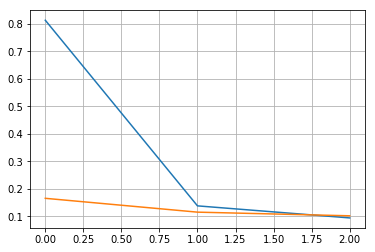

In [48]:
#Plot loss
pyplot.plot(history["loss"])
pyplot.plot(history["val_loss"])
pyplot.grid()

In [49]:
#Load best model
model.load_weights('weights.hdf5')
#Predict using best model
results = model.evaluate(x_test,y_test,batch_size=10)
print("test loss, test acc:", results)

10000/10000 [==============================] - 20s 2ms/step
test loss, test acc: [0.08834109799559883, 0.9735000133514404]
